# Words Analysis

This analysis analyses collected text and meta-data from scientific articles about that mention ERPs.

Available information includes the titles, words, and years of all those papers such that this data can be used for further analysis.

In [1]:
%matplotlib inline

import numpy as np

from lisc import Words
from lisc.data import Articles, ArticlesAll
from lisc.utils import SCDB, load_object
from lisc.utils.io import load_txt_file
from lisc.plts.words import plot_years, plot_wordcloud
from lisc.analysis.words import get_all_counts, get_all_values

In [2]:
# Import custom project code
import sys
sys.path.append('../code')
from plts import plot_count_hist

## Setup

In [3]:
# Settings
SAVE_FIG = True

In [4]:
# Set the file locations
term_dir = '../terms/'
figs_dir = '../data/figures/words'
db = SCDB('../data/')

# Set the name of the file to load
name = 'erps' # 'erps', 'test'

In [5]:
# Load the words object
words = load_object('words_' + name, directory=db, reload_results=True)

In [6]:
# Load exclusions for analysis
exclusions = load_txt_file('analysis_exclusions.txt', term_dir, split_elements=False)

### Check Database Information

Check the metadata about the data collection, including checking the database data were collected from.

In [7]:
# Check database scrape info
words.meta_data.db_info

{'dbname': 'pubmed',
 'menuname': 'PubMed',
 'description': 'PubMed bibliographic record',
 'dbbuild': 'Build210226-2212m.3',
 'count': '32200710',
 'lastupdate': '2021/02/27 15:01'}

In [8]:
# Check requester object info
words.meta_data.requester

{'n_requests': 457,
 'wait_time': 0.1,
 'start_time': '16:08:58 Sunday 28 February 2021',
 'end_time': '16:40:10 Sunday 28 February 2021',
 'logging': None}

## Data Organization

In [10]:
# Collect ERPs into list of aggragated data objects
all_data = [ArticlesAll(words[erp], exclusions=exclusions) for erp in words.labels]

### Check Number of Articles

In [11]:
# Check the number of ERPs 
print('Number of ERPs: \t {}'.format(words.n_terms))

Number of ERPs: 	 88


In [12]:
# Check the total number of articles in the collected dataset
n_articles = [data.n_articles for data in all_data]
total_article_count = sum(n_articles)
print('Number of papers: \t', total_article_count)

Number of papers: 	 30770


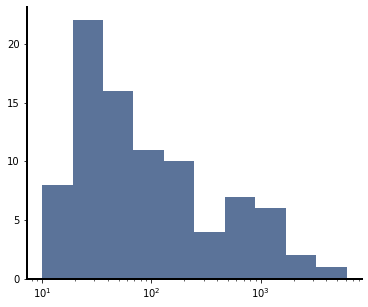

In [13]:
plot_count_hist(n_articles, True,
                save_fig=SAVE_FIG, f_name='erp_hist.pdf', directory=figs_dir)

In [14]:
# Collect all the DOIs across all papers
dois = get_all_values(all_data, 'dois', unique=True)

In [16]:
# Check the number of unique papers, based on DOIs
print('Number of unique DOIs: \t', len(set(dois)))

Number of unique DOIs: 	 21332


### Collect information across all ERPs & papers

In [17]:
# Get global counts of authors and journals
all_authors = get_all_counts(all_data, 'authors', combine=True)
all_journals = get_all_counts(all_data, 'journals', combine=True)

In [18]:
# Check the most common authors
all_authors.most_common(10)

[(('Näätänen', 'R'), 330),
 (('Wang', 'Y'), 254),
 (('Schröger', 'E'), 196),
 (('Zhang', 'Y'), 187),
 (('Polich', 'J'), 184),
 (('Holcomb', 'PJ'), 180),
 (('Li', 'H'), 172),
 (('Friederici', 'AD'), 168),
 (('Wang', 'L'), 164),
 (('Li', 'Y'), 156)]

In [19]:
# Check the most common journals
all_journals.most_common(10)

[('Psychophysiology', 1483),
 ('International journal of psychophysiology : official journal of the International Organization of Psychophysiology',
  1132),
 ('Neuropsychologia', 985),
 ('Clinical neurophysiology : official journal of the International Federation of Clinical Neurophysiology',
  934),
 ('Biological psychology', 898),
 ('Brain research', 803),
 ('Neuroreport', 720),
 ('Journal of cognitive neuroscience', 710),
 ('PloS one', 681),
 ('Electroencephalography and clinical neurophysiology', 663)]

## Check Words

In [20]:
# Check most common words
for data in all_data:
    data.check_frequencies(n_check=5)

P100  : visual, patients, vep, latency, evoked
P150  : patients, group, cells, study, two
P170  : control, components, potentials, early, visual
P180  : cells, patients, cortex, study, cortical
P200  : patients, processing, p300, amplitude, erp
P220  : cells, de, amplitude, potentials, components
P230  : ms, components, differences, stimuli, visual
P240  : amplitude, stimuli, potentials, stimulus, processing
P250  : patients, processing, components, amplitude, task
P270  : stimuli, stimulus, stimulation, amplitude, components
P300  : patients, amplitude, study, latency, cognitive
P3a   : patients, stimuli, auditory, p3b, processing
P3b   : task, processing, stimuli, p3a, amplitude
P340  : pain, seps, patients, potentials, training
P350  : erps, erp, processing, stimuli, components
P400  : faces, infants, stimuli, amplitude, processing
P500  : p, different, erp, subjects, study
P550  : subjects, task, sounds, larger, group
P600  : processing, syntactic, semantic, sentences, n400
N100  :

In [21]:
# Check most common keywords
for data in all_data:
    data.check_frequencies('keywords', n_check=5)

P100  : visual evoked potential, visual evoked potentials, event-related potentials, n170, eeg
P150  : event-related potentials, pregabalin, aging, metabolomics, erps
P170  : congenital hypothyroidism, iodine diet, psychiatric diseases, thyroid hormones, attention
P180  : transcranial magnetic stimulation, tms-eeg, electroencephalography, metabolomics, targeted metabolomics
P200  : event-related potentials, erp, erps, n400, eeg
P220  : cause-specific infant mortality, maternal education, maternal employment, paternal education, paternal employment
P230  : adipose tissue, arcuate nucleus of the hypothalamus, early-life stress, microglia, neuroinflammation
P240  : eeg, somatosensory cortex, touch, chinese three-character verb–object metaphor, contextual effect
P250  : erps, mlpa, n170, p100, velocardiofacial syndrome
P270  : directed transfer function/adaptive directed transfer function, stereoscopic depth, visual discomfort, visual evoked potential, face
P300  : event-related potentials

### Summaries

In [22]:
# Check an example summary
ind = 19
all_data[ind].create_summary()
all_data[ind].print_summary()

N100 :
  Number of articles: 		 1020
  First publication: 		 1980
  Most common author: 		 Boutros NN
    number of publications: 	 33
  Most common journal: 		 Clinical neurophysiology : official journal of the International Federation of Clinical Neurophysiology
    number of publications: 	 55 



### WordCloud Plots

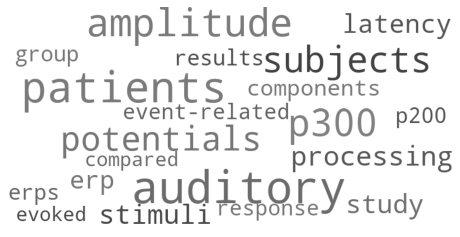

In [23]:
# Create a wordcloud
plot_wordcloud(all_data[ind].words, 20)

### Data Plots

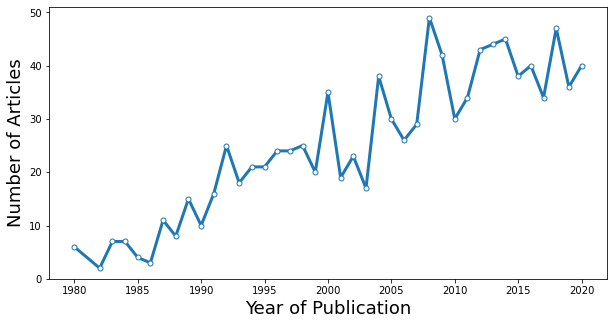

In [24]:
# Check an example history plot
plot_years(all_data[ind].years, [None, 2020])

In [25]:
# Check how many articles were found per ERP
for data in all_data:
    print(data.label, '\t', data.n_articles)

P100 	 1821
P150 	 217
P170 	 39
P180 	 92
P200 	 843
P220 	 50
P230 	 27
P240 	 31
P250 	 97
P270 	 17
P300 	 6110
P3a 	 1007
P3b 	 1054
P340 	 10
P350 	 72
P400 	 180
P500 	 66
P550 	 16
P600 	 708
N100 	 1020
N110 	 22
N120 	 56
N130 	 40
N140 	 176
N150 	 120
N160 	 64
N170 	 1357
N180 	 38
N190 	 23
N200 	 769
N2a 	 174
N2b 	 233
N2c 	 35
N2pc 	 497
N240 	 19
N250 	 265
N270 	 66
N280 	 23
N290 	 51
N300 	 195
N320 	 25
N350 	 83
N400 	 2555
N450 	 177
N550 	 52
N600 	 16
N700 	 18
MMN 	 3601
LPC 	 641
LPP 	 23
NSW 	 102
PSW 	 111
VPP 	 57
CNV 	 1004
PINV 	 32
ELAN 	 33
LAN 	 54
CPS 	 37
LRP 	 300
LDN 	 35
ORN 	 37
BP 	 521
ERN 	 1017
Pe 	 301
CRN 	 92
MFN 	 94
SPeN 	 122
FRN 	 574
Pd 	 22
EDAN 	 22
LDAP 	 15
ADAN 	 29
EPN 	 235
SN 	 76
SP 	 33
SPN 	 19
SPCN 	 41
PCN 	 62
VsEP 	 193
MRPC 	 297
FSP 	 20
pN 	 23
LPN 	 28
LPP 	 23
EFN 	 10
FN400 	 165
PMN 	 12
VAN 	 31
